## Import Libraries & Load Dataset

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dense , Dropout , Flatten
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Cifar10 Dataset

In [2]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


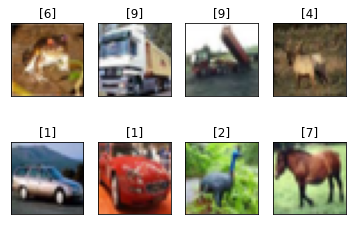

In [3]:
image_label = list(zip(X_train.reshape(-1,32,32,3),Y_train))
for index,(image,label) in enumerate(image_label[:8]):
    plt.subplot(2,4,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    plt.title(label)

# Preprocessing

In [3]:
X_train = X_train / 255
X_test = X_test / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [4]:
X_val , X_test , Y_val , Y_test = train_test_split(X_test,Y_test,test_size=0.5)

**We have 50,000 training data and it is ready for injection into the neural network**

# Model

## MLP

In [5]:
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(X_train.shape[1:])))
model_mlp.add(Dense(512,activation="relu"))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(256,activation="relu"))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(128,activation="relu"))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(10,activation="softmax"))

In [6]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

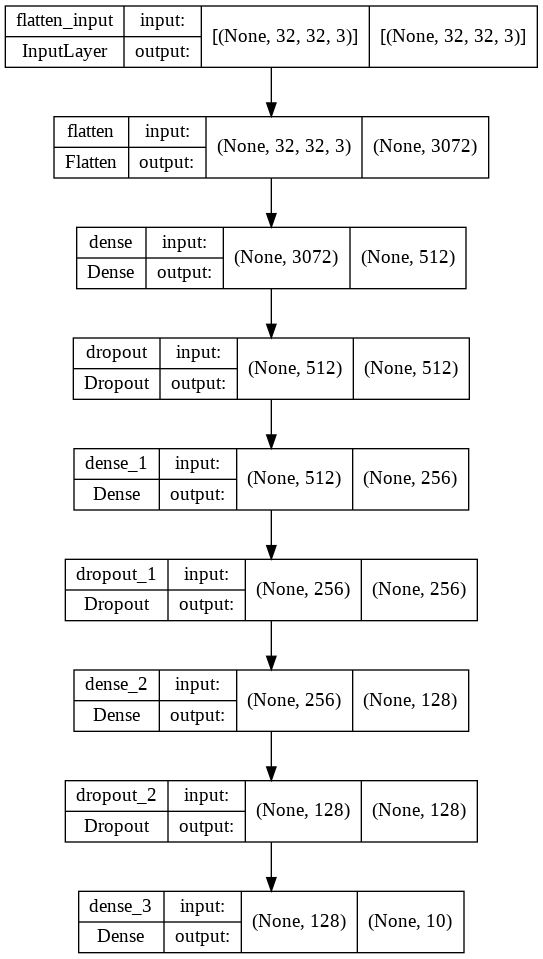

In [7]:
plot_model(model_mlp,show_shapes=True)

In [8]:
model_mlp.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint_mlp = ModelCheckpoint("MLP_Cfar10model.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [9]:
history = model_mlp.fit(X_train,Y_train,epochs=100,validation_data=(X_val,Y_val),batch_size=300,callbacks=[checkpoint_mlp])

Epoch 1/100
167/167 [==============================] - 5s 18ms/step - loss: 2.1193 - accuracy: 0.2130 - val_loss: 1.8607 - val_accuracy: 0.3280
Epoch 2/100
167/167 [==============================] - 2s 14ms/step - loss: 1.9097 - accuracy: 0.3034 - val_loss: 1.7748 - val_accuracy: 0.3682
Epoch 3/100
167/167 [==============================] - 2s 12ms/step - loss: 1.8363 - accuracy: 0.3374 - val_loss: 1.7184 - val_accuracy: 0.3846
Epoch 4/100
167/167 [==============================] - 2s 10ms/step - loss: 1.7920 - accuracy: 0.3541 - val_loss: 1.6958 - val_accuracy: 0.4000
Epoch 5/100
167/167 [==============================] - 2s 10ms/step - loss: 1.7591 - accuracy: 0.3662 - val_loss: 1.6478 - val_accuracy: 0.4112
Epoch 6/100
167/167 [==============================] - 2s 9ms/step - loss: 1.7223 - accuracy: 0.3820 - val_loss: 1.6116 - val_accuracy: 0.4330
Epoch 7/100
167/167 [==============================] - 1s 9ms/step - loss: 1.7077 - accuracy: 0.3845 - val_loss: 1.6040 - val_accuracy: 0

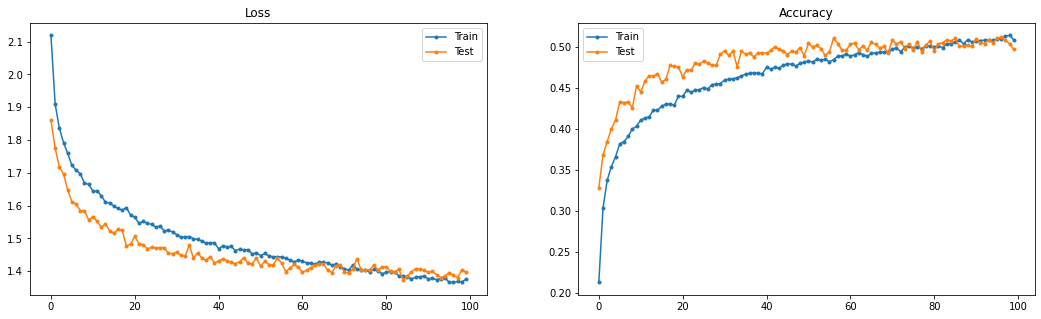

In [10]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [11]:
model_mlp.evaluate(X_test,Y_test)

157/157 [==============================] - 1s 4ms/step - loss: 1.3926 - accuracy: 0.4962


[1.3925502300262451, 0.49619999527931213]

## CNN

In [12]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64,(3,3),activation="relu",padding="same",input_shape=(X_train.shape[1:])))
model_cnn.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model_cnn.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model_cnn.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(256,activation="relu"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(128,activation="relu"))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10,activation="softmax"))

In [13]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                      

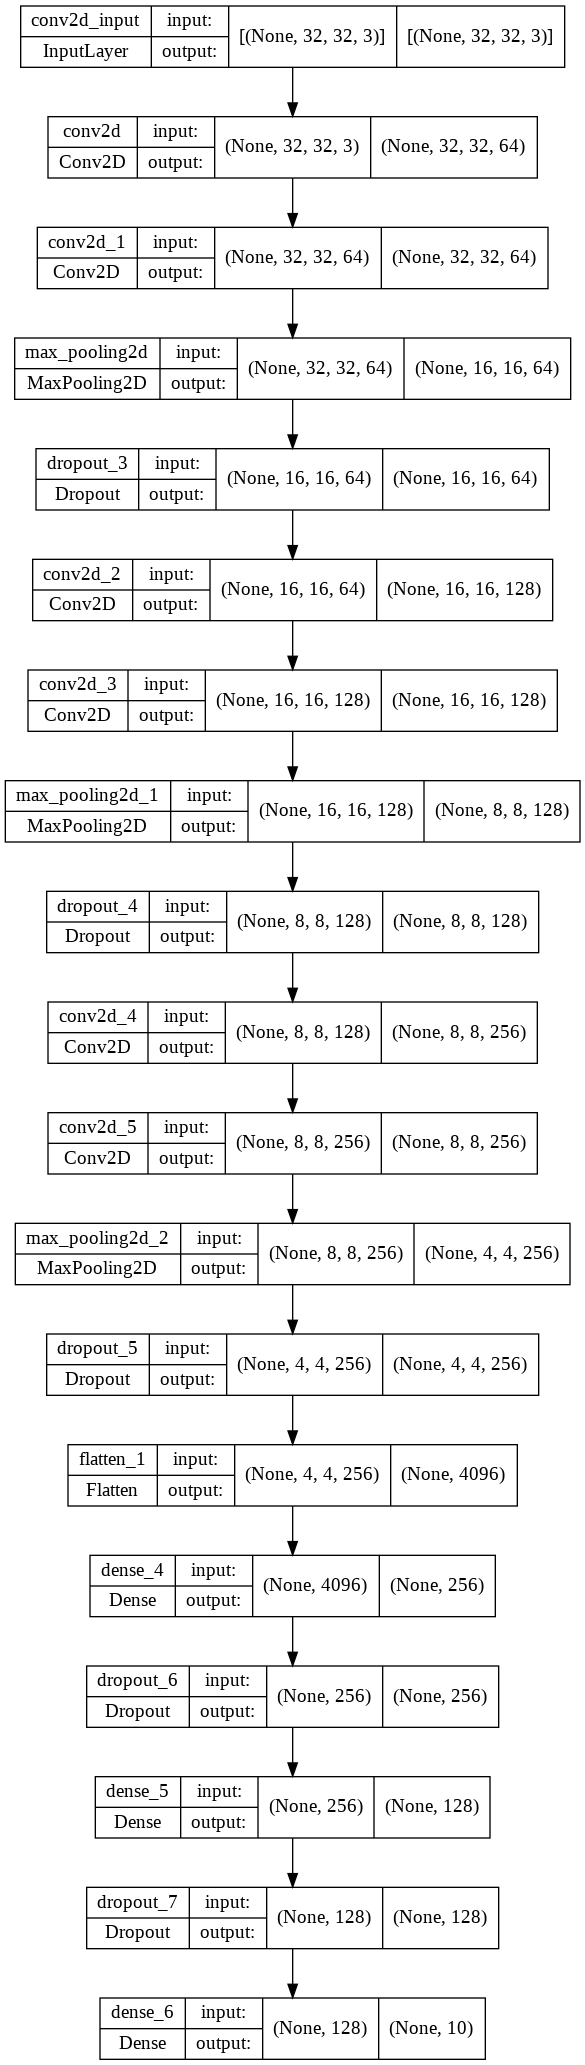

In [14]:
plot_model(model_cnn,show_shapes=True)

In [15]:
model_cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint_cnn = ModelCheckpoint("CNN_Cfar10model.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [16]:
history = model_cnn.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=[checkpoint_cnn],batch_size=300)

Epoch 1/50
167/167 [==============================] - 27s 141ms/step - loss: 1.9862 - accuracy: 0.2495 - val_loss: 1.5597 - val_accuracy: 0.4172
Epoch 2/50
167/167 [==============================] - 22s 129ms/step - loss: 1.4516 - accuracy: 0.4676 - val_loss: 1.1524 - val_accuracy: 0.5788
Epoch 3/50
167/167 [==============================] - 22s 129ms/step - loss: 1.1658 - accuracy: 0.5858 - val_loss: 0.9967 - val_accuracy: 0.6550
Epoch 4/50
167/167 [==============================] - 22s 129ms/step - loss: 1.0086 - accuracy: 0.6468 - val_loss: 0.8502 - val_accuracy: 0.7094
Epoch 5/50
167/167 [==============================] - 22s 129ms/step - loss: 0.8858 - accuracy: 0.6944 - val_loss: 0.8130 - val_accuracy: 0.7248
Epoch 6/50
167/167 [==============================] - 22s 129ms/step - loss: 0.7948 - accuracy: 0.7289 - val_loss: 0.7959 - val_accuracy: 0.7286
Epoch 7/50
167/167 [==============================] - 22s 129ms/step - loss: 0.7079 - accuracy: 0.7569 - val_loss: 0.6823 - val_ac

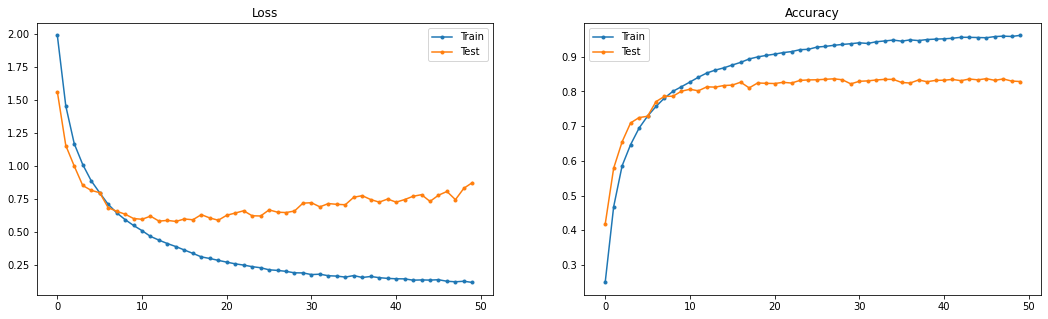

In [17]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [18]:
model_cnn.evaluate(X_test,Y_test)

157/157 [==============================] - 2s 11ms/step - loss: 0.8719 - accuracy: 0.8288


[0.8719030022621155, 0.8288000226020813]